# Tarea 6.5

Veinte números aleatorios independientes se sacan de una distribución uniforme entre 0 y 1. 

* Use monte carlo para estimar la probabilidad de que la suma de los números esté entre 9 y 10. Ídem entre 15 y 16.

* Use el teorema del límite central y compare con la distribución gaussiana. (Se dice que la gaussiana no describe eventos en las colas.)

Recuerde estimar el error de la simulación, así como cuantificar con errores relativos la diferencia entre la simulación y la gaussiana.

Pista:

$$
\int_0^a dx\,e^{-x^2} = \frac{\sqrt{\pi}}{2}\text{erf}(a)
$$

donde $\text(a)$ es la función de error y en python se puede llamar usando scipy.special.erf del modulo scipy.

# Intento de Solución

### Monte Carlo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#Generamos muchos números aleatorios entre 0 y 1(mi computador se muere si genero más de 10000000 números).
numeros = np.array([random.uniform(0,1) for n in range(10000000)])

In [3]:
#Elejimos de manera aleatoria 20 números de los 10000000 originales y repetimos esto 10000 veces.
muestra = np.array([random.choices(numeros, k = 20) for n in range(10000)])
# COMENTARIO: 
# hay una manera más eficiente de hacerlo que no te mata el pc: 
# muestra = np.random.uniform(0, 1, 10000000).reshape((-1,20))
# En un contexto profesional o de investigación hay que usar el poder de numpy!

In [4]:
#Ahora sumamos los 20 números de cada repetición.
suma = muestra.sum(axis=1)

In [5]:
#Con esta función buscamos el número de elementos existentes en un cierto rango
def busqueda(a,b):
    valores = (a <= suma) & (suma <= b)
    valores1 = suma[valores]
    p = len(valores1)
    return p

In [6]:
#La probabilidad de que la suma de los 20 números esté entre 9 y 10
(busqueda(9,10)/10000)*100

27.66

In [7]:
#La probabilidad de que la suma de los 20 números esté entre 15 y 16
(busqueda(15,16)/10000)*100

0.01

Estimando el error:

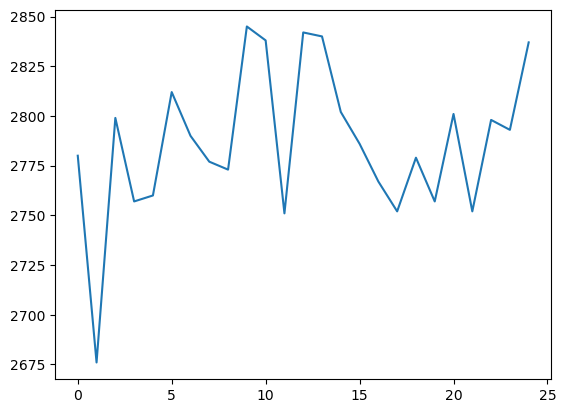

In [8]:
#Repetimos varias veces la simulación para determinar la probabilidad de que la suma de los números esté entre 9 y 10.
#Luego graficamos

sims = 25
probs = np.zeros(sims)

for i in range(sims):
    muestra = np.array([random.choices(numeros, k = 20) for n in range(10000)])
    suma = muestra.sum(axis=1)
    probs[i] = busqueda(9,10)

plt.plot(np.arange(sims), probs)
plt.show()

In [9]:
probs.mean()

2786.56

In [10]:
probs.std()

37.44658061826206

Repetí la simulación algunas veces y la máxima desviación estándar que encontré era algo mayor a 60, por lo que podría estimar el error de la simulación esta entorno a un 6%

<span style="color:red;">El error porcentual debe ser estimado como $\mu/\sigma$, que en este caso es del orden de $1\%$</span>

<span style="color:red;">No es correcto correr muchas veces y tomar el peor valor de $\sigma$. Una mejor estimación de $\sigma$ es tomando el valor típico al correr muchas veces.</span>

### Teorema del límite central y distribución gaussiana

In [11]:
#Calculamos la media de cada muestra 
promedio = suma/20

In [12]:
#Distribución gaussiana
def gauss(x, mu, sigma):
    return np.exp(-(x - mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

In [13]:
#Calculamos la media del conjunto que contiene 10000000 de números
mu =((sum(numeros))/10000000)

In [14]:
mu

0.5000233232869435

In [15]:
#Calculamos la desviación estándar para el ajuste gaussiano de las medias muestrales, utilizando el teorema del límite central
sigma = np.sqrt(((np.std(numeros))**2)/20)

In [16]:
sigma

0.06453836781735478

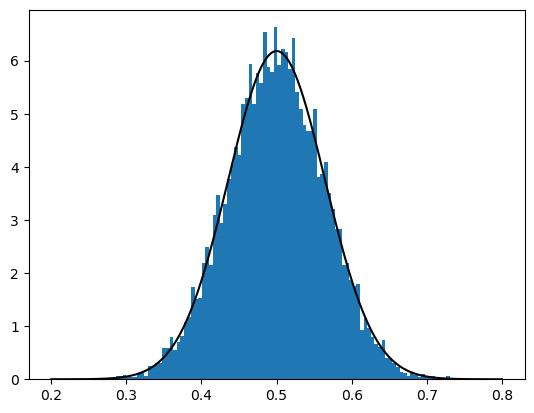

In [17]:
#Graficamos las medias muestrales
#Graficamos la distribución gaussiana que se ajusta al conjunto de medias muestrales según el teorema del límite central

x = np.linspace(0.2,0.8,10000)
plt.plot(x, (gauss(x, mu, sigma)),"k")
plt.hist(promedio , density=True , bins=100)
plt.show()

In [18]:
#Ahora ajuste una gaussiana usando la media y desviación estándar de los datos correspondientes a las medias muestrales
m=(sum(promedio)/10000)
d=np.std(promedio)

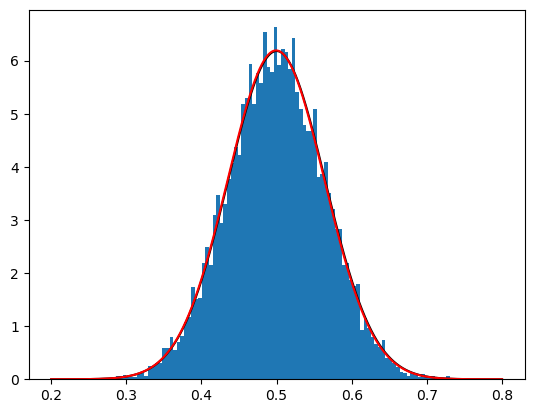

In [19]:
#Graficamos la nueva gaussiana para compararla con el ajuste anterior realizado con el teorema del límite central
x = np.linspace(0.2,0.8,10000)
plt.plot(x, (gauss(x, mu, sigma)),"k")
plt.plot(x, (gauss(x, m, d)),"r")
plt.hist(promedio , density=True , bins=100)
plt.show()

Vemos que más o menos se superpone con la gaussiana que generamos con el teorema del límite central

# Calificación: 6.0

No se bajó la nota por los comentarios de arriba. Eran sólo para aclarar.

Se bajó la nota porque faltó comparar con la probabilidad obtenida a partir de la gaussiana.